# Research Question

### A1 - Research Question

We have collected 2 years of revenue from a telecom company. With this data, can predict the revenue of the company in the next quarter? This information will help the company organize their resources and plan for any network expansions

### A2 - Objective and Goal

The obective of this study is to use Time Series Analysis to forecast our data and to determine whether the revenue of the telecom company will increase during the next quarter.

# Method Justification

### B1 - Assumptions

As states by David Brillinger, "One basic assumption of time series analysis is that of stationarity." Stationarity means that the mean and the variance of the data do not vary accross time or is constant.

Autocorrelation is another assumption we need to verify with our time series. "Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself." - Igor Milovanovic. We will be using autocorrelation function (ACF) and partial autocorrelation function (PACF) on our time series.




# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#read the csv file
df = pd.read_csv('teleco_time_series .csv')
df

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554
...,...,...
726,727,16.931559
727,728,17.490666
728,729,16.803638
729,730,16.194814


In [2]:
#check the shape of the dataframe
df.shape

(731, 2)

In [3]:
#convert the day columns in to a DateTime format
from datetime import datetime
df['Day'] = (pd.date_range(start=datetime(2019,1,1), periods=df.shape[0], freq='24H'))
df.set_index('Day', inplace=True)
df.head()

,Revenue
Day,
2019-01-01,0.000000
2019-01-02,0.000793
2019-01-03,0.825542
2019-01-04,0.320332
2019-01-05,1.082554


### C1 - Line Graph Visualization


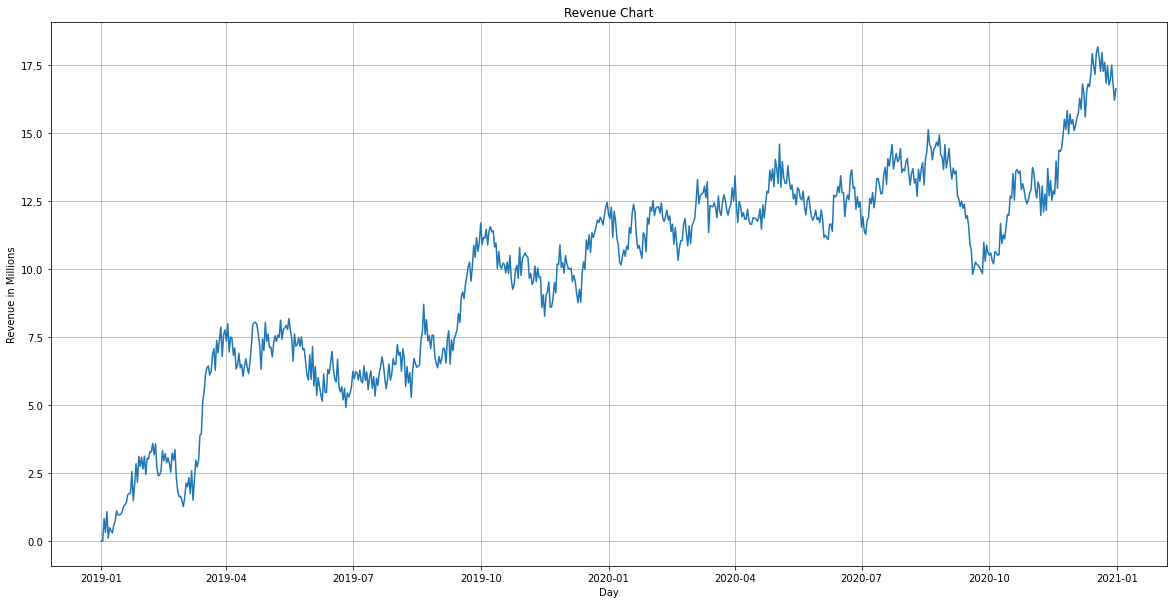

In [4]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df.Revenue)
plt.title('Revenue Chart')
plt.xlabel('Day')
plt.ylabel('Revenue in Millions')
plt.grid(True)
plt.show()

### C2 - Time Step Formatting

In [5]:
#check for any na values
df.isna().values.any()

False

In [6]:
#check for any null values
df.isnull().values.any()

False

No gaps have been found in our time series.

### C3 - Stationarity

Using ADFuller test, we will check the ADF value, p-value and other critical values. This will determine if we should reject the null hypothesis or fail to reject it.

In [7]:
from statsmodels.tsa.stattools import adfuller
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print('Reject Ho: Time Series is Stationary')
else:
    print('Failed to reject Ho: Time Series is not Stationary')

ADF Statistic: -1.924612
p-value: 0.320573
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Failed to reject Ho: Time Series is not Stationary


Our time series is non Staionary. This is one of our assumptions before using Time Series Analysis. We must transform our data  with a differencing technique to convert it into Stationary form.

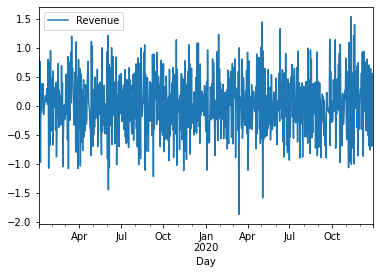

In [8]:
#transform time series through one order of differencing and will be used for ARIMA later
result_stat = df.diff()
result_stat.dropna(how='all', inplace=True)
result_stat.plot()

In [9]:
X = result_stat.values
result1 = adfuller(X)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result1[0] < result1[4]['5%']:
    print('Reject Ho: Time Series is Stationary')
else:
    print('Failed to reject Ho: Time Series is not Stationary')

ADF Statistic: -44.874527
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Reject Ho: Time Series is Stationary


Now, our time series is Stationary. 
result_stat will be used in our ARIMA model

Here, we will display the autocorrelation of our time series using plot_acf

[1.         0.98375067 0.97679376 0.96584953 0.95545834 0.94515237
 0.93469998 0.92356074 0.91259674 0.9007179  0.88986482 0.87820542
 0.86783127 0.85669648 0.84568014 0.83433728 0.82369773 0.81266219
 0.80261913 0.79240124 0.78364098 0.77521764 0.76563762 0.75985141
 0.75066964 0.742678   0.73537013 0.72746968 0.72092685 0.71435789
 0.70827958 0.70240237 0.69647315 0.69006167 0.68432411 0.67889965
 0.6730078  0.66649597 0.66008687 0.65416797 0.64929254]


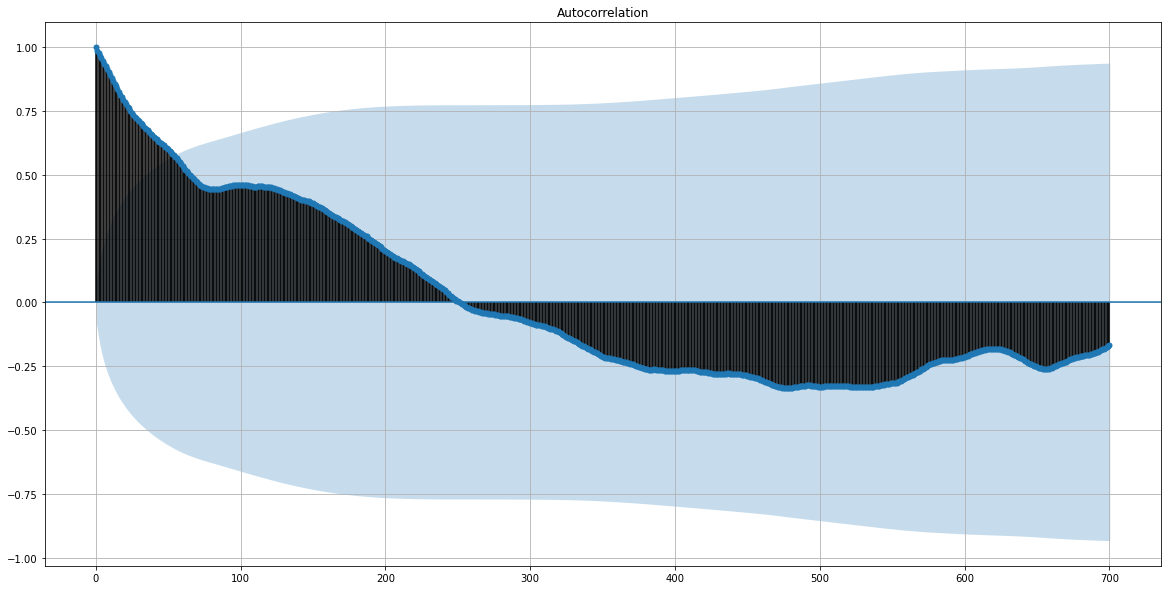

In [10]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute the acf array of HRB
acf_df = acf(df)
print(acf_df)

# Plot the acf function
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df,alpha=0.05, lags=700, ax=ax)
plt.grid(True)
plt.show()

### C4 - Explain the prepared data

These are the steps that were done to prepare the data:
1. Import our csv file
2. Check the number of rows and columns
3. Convert the Day column into a DateTime format and use it as our index
4. Check for any NA or NULL values
5. Check for Stationarity using ADFuller test and Autocorrelation Function or ACF
6. Split the data into train and test sets
7. Save the cleaned dataframe into a new csv file called TimeSeries.csv

Training dataset will be from the beginning of the time series 2019-01-01 up to 2020-08-05. Test dataset will be from 2020-08-06 up to 2020-12-31.

train dataset shape:  (583, 1)
test dataset shape:  (148, 1)


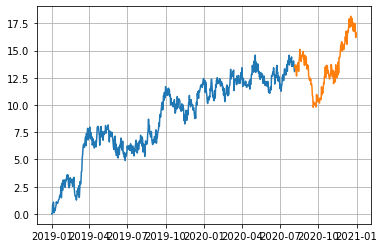

In [11]:
train = df.loc[:'2020-08-05']
test = df.loc['2020-08-06':]
print('train dataset shape: ', train.shape)
print('test dataset shape: ', test.shape)
plt.grid(True)
plt.plot(train)
plt.plot(test)

In [12]:
train.head()

,Revenue
Day,
2019-01-01,0.000000
2019-01-02,0.000793
2019-01-03,0.825542
2019-01-04,0.320332
2019-01-05,1.082554


In [13]:
test.head()

,Revenue
Day,
2020-08-06,13.504886
2020-08-07,13.684826
2020-08-08,13.152903
2020-08-09,13.310290
2020-08-10,12.665601


In [14]:
#saves our dataframe into a csv file named pca.csv
df.to_csv('TimeSeries.csv')

# Model Identification and Analysis

### D1 - Reported Findings

#### D1a - Seasonality

Based on the plot below, while there is a positive trend with our dataset, there is no seasonal component.

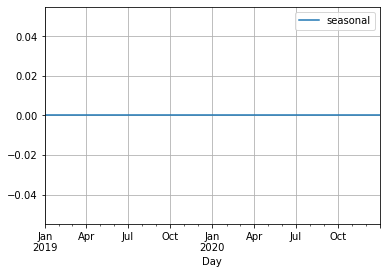

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

season = seasonal_decompose(df, model='additive', period=1)

%matplotlib inline
season.seasonal.plot()
plt.grid(True)
plt.legend()
plt.show()

No seasonality detected in our time series.

#### D1b - Trends



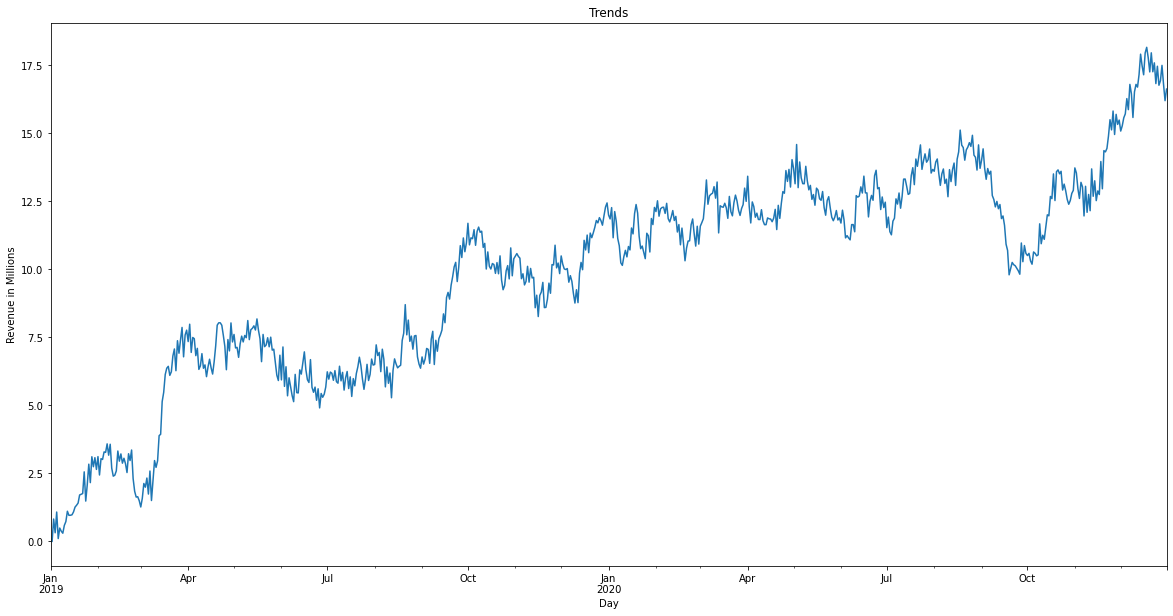

In [16]:
plt.figure(figsize=(20,10))
plt.title('Trends')
plt.xlabel('Day')
plt.ylabel('Revenue in Millions')
plt.grid(True)
season.trend.plot()

#### D1c - Autocorrelation Function and Partial Autocorrelation Function


Text(0, 0.5, 'ACF')

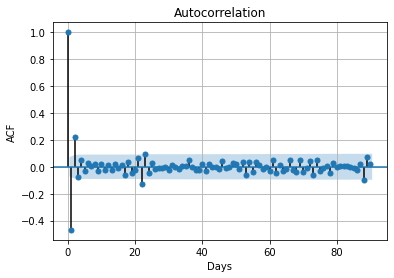

In [17]:
plot_acf(result_stat, lags=90);
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

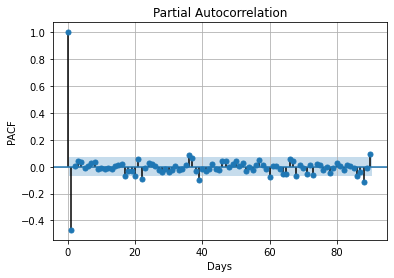

In [18]:
plot_pacf(result_stat, lags=90);
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('PACF')

#### D1d - Spectral Density



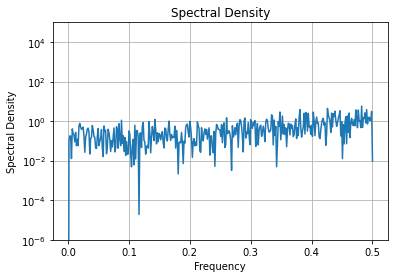

In [19]:
from scipy import signal
f, Pxx_den = signal.periodogram(result_stat['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6,1e5])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.grid(True)
plt.show()

#### D1e - Decomposition

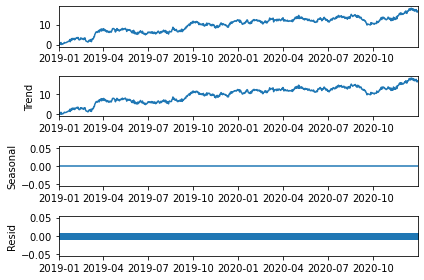

In [20]:
season.plot();

#### D1f - Residual

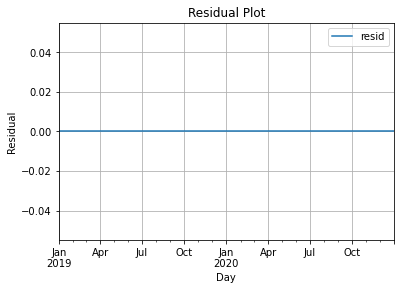

In [21]:
season.resid.plot()
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.grid(True)
plt.legend()
plt.show()

### D2 - ARIMA


In [22]:
from pmdarima import auto_arima

In [23]:
#d = 1 indicates one order of differencing
arima_model = auto_arima(train, start_p = 0, d = 1, start_q = 0, trace=True, supresswarnings = True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.017, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=772.570, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=798.450, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=908.077, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=774.568, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=774.569, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=776.313, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=773.490, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.340 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  583
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -383.285
Date:                Mon, 11 Apr 2022   AIC                            772.570
Time:                        03:52:28   BIC                            785.669
Sample:                             0   HQIC                           777.676
                                - 583                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.020      1.701      0.089      -0.005       0.071
ar.L1         -0.4600      0.036    -12.629      0.000      -0.531      -0.389
sigma2         0.2185      0.014     15.992      0.000       0.192       0.245
===================================================================================
Ljung-Box (Q):                       36.83   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.61   Prob(JB):                         0.41
Heteroskedasticity (H):               0.98   Skew:                            -0.07
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
prediction = pd.DataFrame(arima_model.predict(n_periods=148), index=test.index)
prediction.columns = ['Predicted Revenue']
prediction

,Predicted Revenue
Day,
2020-08-06,13.317230
2020-08-07,13.242521
2020-08-08,13.310080
2020-08-09,13.312200
2020-08-10,13.344419
...,...
2020-12-27,16.501814
2020-12-28,16.524550
2020-12-29,16.547287


In [25]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
#from sklearn.metrics import mean_absolute_percentage_error as MAPE


#compute mean squared error
mse_dt = MSE(test['Revenue'], prediction['Predicted Revenue'])

#compute root mean square error
rmse_dt = mse_dt**(1/2)

#compute mean absoulte error
mae = MAE(test['Revenue'], prediction['Predicted Revenue'])

#compute mean absolute percentage error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

mape = MAPE(test['Revenue'], prediction['Predicted Revenue'])

print('The mean of the TM is:', test['Revenue'].mean())
print('The mean squared error is:' ,mse_dt)
print('The root mean squared error is: ', rmse_dt)
print('The mean absolute error is: ', mae)
print('The mean absolute percentage error is: ', mape)

The mean of the TM is: 13.644136290912162
The mean squared error is: 4.844088974937521
The root mean squared error is:  2.2009291162910087
The mean absolute error is:  1.745685543845496
The mean absolute percentage error is:  14.478364411501845


In [26]:
#load our library containing our ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [27]:
#train and fit our model
model = ARIMA(train['Revenue'], order = (1,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Revenue   No. Observations:                  582
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -383.285
Method:                       css-mle   S.D. of innovations              0.467
Date:                Mon, 11 Apr 2022   AIC                            772.570
Time:                        03:52:28   BIC                            785.669
Sample:                    01-02-2019   HQIC                           777.676
                         - 08-05-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0227      0.013      1.713      0.087      -0.003       0.049
ar.L1.D.Revenue    -0.4600      0.037    -12.509      0.000      -0.532      -0.388
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1740           +0.0000j            2.1740            0.5000
-----------------------------------------------------------------------------
"""

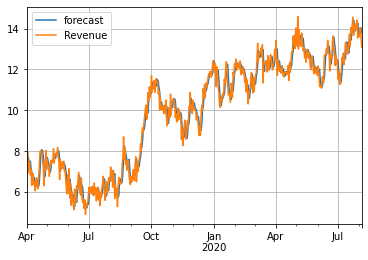

In [28]:
#predict our model
model.plot_predict(start=90, dynamic=False)
plt.grid(True)
plt.legend()
plt.show()

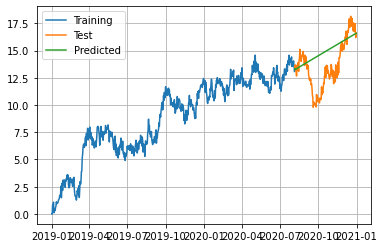

In [29]:
#display prediction after actual values from our train set
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.grid(True)
plt.legend()
plt.show()

### D3 - Forecasts

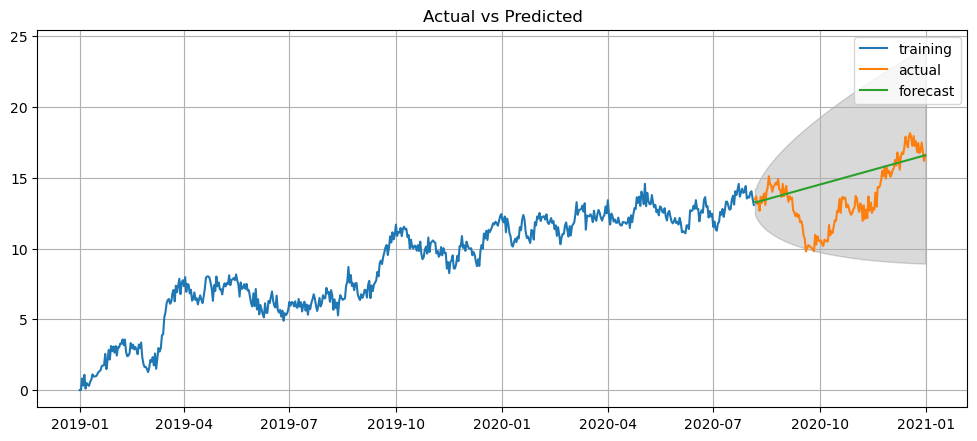

In [30]:
# Build Model

model1 = ARIMA(train, order=(1, 1, 0))  
fitted = model1.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(148, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Actual vs Predicted')
plt.grid(True)
plt.legend()
plt.show()

### D4 - Output and Calculations

#### Stationarity Code

In [31]:
X = result_stat.values
result1 = adfuller(X)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result1[0] < result1[4]['5%']:
    print('Reject Ho: Time Series is Stationary')
else:
    print('Failed to reject Ho: Time Series is not Stationary')

ADF Statistic: -44.874527
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Reject Ho: Time Series is Stationary


#### ACF and PACF Code

Text(0, 0.5, 'ACF')

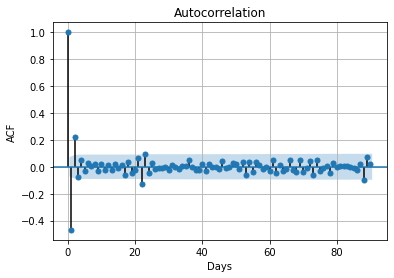

In [32]:
plot_acf(result_stat, lags=90);
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

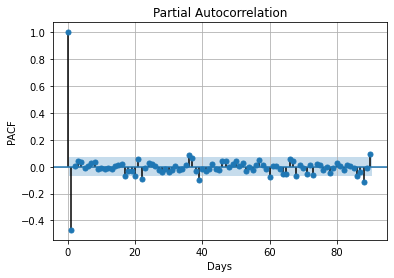

In [33]:
plot_pacf(result_stat, lags=90);
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('PACF')

#### Model Code with auto_arima Results and Summary

In [34]:
arima_model = auto_arima(train, start_p = 0, d = 1, start_q = 0, trace=True, supresswarnings = True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.017, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=772.570, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=798.450, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=908.077, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=774.568, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=774.569, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=776.313, Time=0.60 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=773.490, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.296 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  583
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -383.285
Date:                Mon, 11 Apr 2022   AIC                            772.570
Time:                        03:52:31   BIC                            785.669
Sample:                             0   HQIC                           777.676
                                - 583                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.020      1.701      0.089      -0.005       0.071
ar.L1         -0.4600      0.036    -12.629      0.000      -0.531      -0.389
sigma2         0.2185      0.014     15.992      0.000       0.192       0.245
===================================================================================
Ljung-Box (Q):                       36.83   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.61   Prob(JB):                         0.41
Heteroskedasticity (H):               0.98   Skew:                            -0.07
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecast future dates after train data

In [35]:
model2 = ARIMA(df, order=(1, 1, 0))  
fitted2 = model2.fit()
df.tail()

,Revenue
Day,
2020-12-27,16.931559
2020-12-28,17.490666
2020-12-29,16.803638
2020-12-30,16.194814
2020-12-31,16.620798


In [36]:
index_future_dates = pd.date_range(start='2021-01-01',end='2021-03-31')
forecast = fitted2.forecast(steps=90)[0]
forecast_df = pd.DataFrame(forecast, columns=['Forecast Revenue'])
forecast_df.index=index_future_dates
forecast_df

,Forecast Revenue
2021-01-01,16.454120
2021-01-02,16.565537
2021-01-03,16.546463
2021-01-04,16.588620
2021-01-05,16.602045
...,...
2021-03-27,18.435679
2021-03-28,18.458280
2021-03-29,18.480882
2021-03-30,18.503483


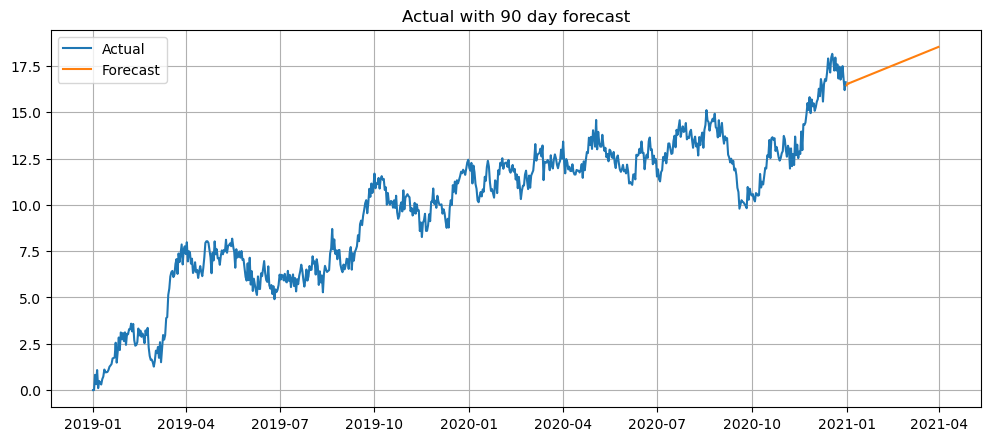

In [37]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Actual')
plt.plot(forecast_df, label='Forecast')
plt.title('Actual with 90 day forecast')
plt.grid(True)
plt.legend()
plt.show()

# Data Summary and Implications

### E1 - Data Analysis Results

#### E1a- ARIMA Model Result

    After analyzing the time series data, checking for trends, seasonality and autocorrelations, the ARIMA model has determined a p, d, q value of (1, 1, 0) and seasonal coefficients (0, 0, 0) with an AIC score of 772. The time series was not stationary and had to be transformed through one order of differencing to achieve stationarity and have an acceptable p-value.

#### E1b - Prediction

    The ARIMA model was used to run a prediction using our train set and  then plot it with the test set and predicted values. The mean of the time series is 13.64, the mean squared error is 4.84, the root mean squared error is 2.20, the mean absolute error is 1.74, the mean absolute percentage error is 14.47.

#### E1c - Forecast

    The ARIMA model was also used to forecast future values. Using the whole time series for training, 90 days after the time series was forecasted showing an upward trend. This has answered our research question whether the telecom company will see an increase in their revenue in the next quarter.
    
#### E1d - Model Evaluation

    The revenue of the next quarter was calculated to increaase accuracy of our forecast. The mean of our time series dataset is 13.64 and our RMSE is 2.2 which is our average error. It is a little high but could still be tweaked using addional techniques to increase stationarity or acquire additional revenue information. The mean absolute percentage error is 14.47

### E2 - Annotated Visualization

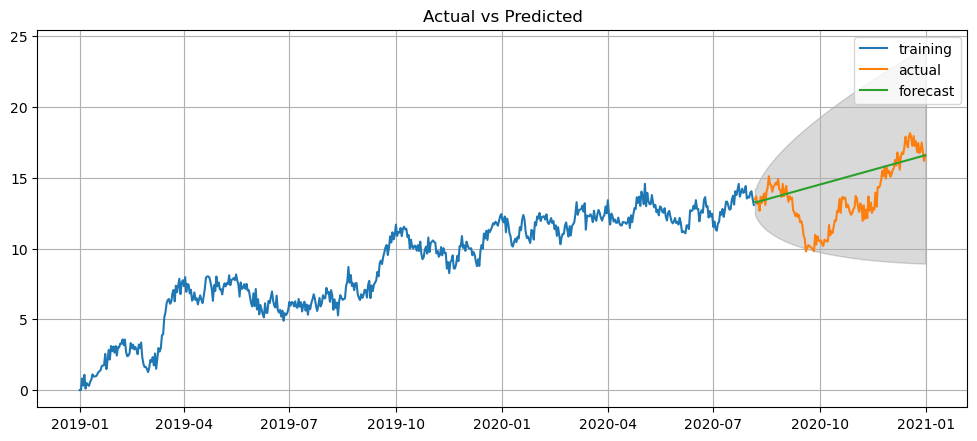

In [39]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Actual vs Predicted')
plt.grid(True)
plt.legend()
plt.show()

### E3 - Course Of Action

    The ARIMA model we have analyzed does not give a high degree of accuracy in forecasting the exact revenue for each day in the next quarter. It does, however, show an upward trend in revenue during the next 90 days. The model should only be used to predict short term prediction to have a higher degree of accuracy. More data would be needed if management need to forecast revenue for the next year.

### References

* David R. Brillinger (2020) - Time Series: General. Retrieved from https://www.stat.berkeley.edu/~brill/Papers/encysbs.pdf 
* Igor Milovanović (2013) - Python Data Visualization Cookbook. Retrieved from https://ebookcentral.proquest.com/lib/westerngovernors-ebooks/detail.action?docID=1572893

### Third Party Code

* https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861
* https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/